SNR: 1.1096203319125437
MSE: 0.014628373727660767
ZCR Difference: 0.2598812419890659


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


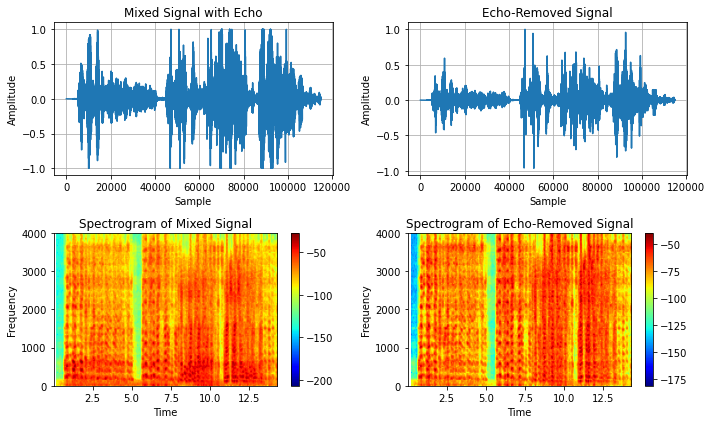

In [12]:
#LMS Alogorithm with spectrogram

import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def echo_cancellation(x, echo_delay, mu=0.2, filter_length=1024):
    # Initializatio
    w = np.zeros(filter_length)
    y = np.zeros(len(x))
    e = np.zeros(len(x))
    
    # Apply LMS algorithm
    for n in range(filter_length, len(x)):
        u = x[n-echo_delay:n]
        u_padded = np.pad(u, (0, filter_length - len(u)))
        y[n] = np.dot(u_padded, w)
        e[n] = x[n] - y[n]
        w = w + mu * e[n] * u_padded
    
    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 10

# Perform echo cancellation using the LMS algorithm
echo_removed_signal = echo_cancellation(mixed_signal, echo_delay)

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', echo_removed_signal_normalized, fs)

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.specgram(mixed_signal, Fs=fs, cmap = 'jet')
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 2)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.specgram(echo_removed_signal_normalized, Fs=fs,cmap='jet')
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


SNR: 0.3225570798449161
MSE: 0.017687971919859026
ZCR Difference: 0.18822204429271555


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


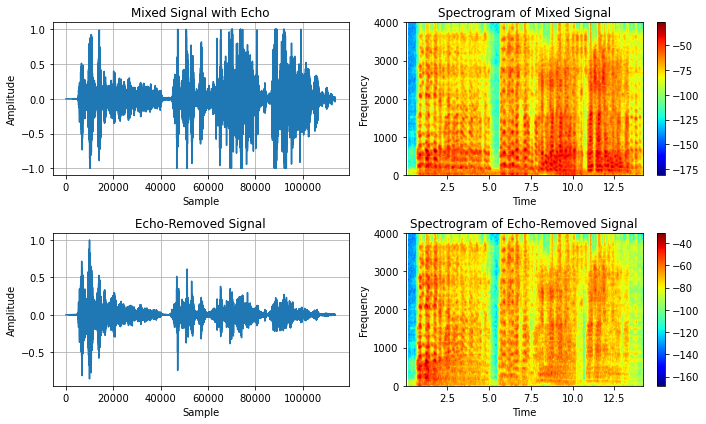

In [8]:
#NLMS Alogoritm using spectrogram

import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def nlms(x, d, N=10, mu=0.3):
    # Initialization
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)

    # Apply NLMS algorithm
    for n in range(nIters):
        u = x[n : n + N]
        e_n = d[n] - np.dot(u, w)
        w = w + (mu / (np.dot(u, u) + 1e-3)) * e_n * u
        e[n] = e_n

    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 10

# Perform echo cancellation using the NLMS algorithm
echo_removed_signal = nlms(mixed_signal, mixed_signal, N=1024, mu=0.1)

# Remove the delay introduced by the NLMS algorithm
echo_removed_signal = echo_removed_signal[echo_delay:]

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', echo_removed_signal_normalized, fs)

# Align the mixed signal by removing the delay introduced by the NLMS algorithm
mixed_signal_aligned = mixed_signal[echo_delay:echo_delay+len(echo_removed_signal_normalized)]

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal_aligned ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal_aligned)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal_aligned)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.specgram(mixed_signal_aligned, Fs=fs,cmap='jet')
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 3)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.specgram(echo_removed_signal_normalized, Fs=fs,cmap='jet')
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_15748\3634152147.py:12: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H = np.zeros(M+1, dtype=np.complex)


SNR: 1.1429115869480717
MSE: 0.014517933101357329
ZCR Difference: 0.004534475090907486


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_15748\3634152147.py:101: RuntimeWarning: divide by zero encountered in log10
  spec_dB = 10 * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_15748\3634152147.py:119: RuntimeWarning: divide by zero encountered in log10
  spec_dB = 10 * np.log10(spec)


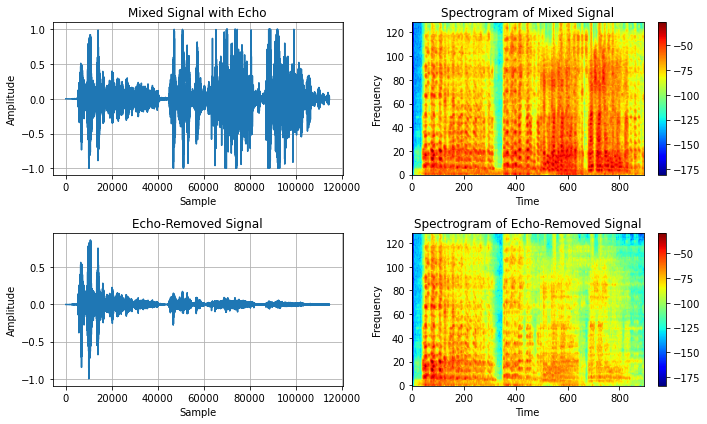

In [13]:
# Main Code of fdkf

import numpy as np
from numpy.fft import rfft as fft
from numpy.fft import irfft as ifft
import soundfile as sf
import matplotlib.pyplot as plt

def fdkf(x, d, M, beta=0.95, sgm2u=1e-2, sgm2v=1e-6):
    Q = sgm2u
    R = np.full(M+1, sgm2v)
    H = np.zeros(M+1, dtype=np.complex)
    P = np.full(M+1, sgm2u)

    window = np.hanning(M)
    x_old = np.zeros(M)

    num_block = min(len(x), len(d)) // M
    e = np.zeros(num_block * M)

    for n in range(num_block):
        x_n = np.concatenate([x_old, x[n*M:(n+1)*M]])
        d_n = d[n*M:(n+1)*M]
        x_old = x[n*M:(n+1)*M]

        X_n = np.fft.rfft(x_n)

        y_n = ifft(H * X_n)[M:]
        e_n = d_n - y_n

        e_fft = np.concatenate([np.zeros(M), e_n * window])
        E_n = fft(e_fft)

        R = beta * R + (1.0 - beta) * (np.abs(E_n)**2)
        P_n = P + Q * (np.abs(H))
        K = P_n * X_n.conj() / (X_n * P_n * X_n.conj() + R)
        P = (1.0 - K * X_n) * P_n

        H = H + K * E_n
        h = ifft(H)
        h[M:] = 0
        H = fft(h)

        e[n*M:(n+1)*M] = e_n

    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 10

# Perform echo cancellation using the FDAKF algorithm
echo_removed_signal = fdkf(mixed_signal, mixed_signal, M=1024)

# Remove the delay introduced by the FDAKF algorithm
echo_removed_signal = echo_removed_signal[echo_delay:]

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo_fdkf.wav', echo_removed_signal_normalized, fs)

# Align the mixed signal by removing the delay introduced by the FDAKF algorithm
mixed_signal_aligned = mixed_signal[echo_delay:echo_delay+len(echo_removed_signal_normalized)]

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal_aligned ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal_aligned)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal_aligned)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
spec, _, _, _ = plt.specgram(mixed_signal_aligned, Fs=fs)
spec_dB = 10 * np.log10(spec)
spec_dB[np.isinf(spec_dB)] = np.min(spec_dB[~np.isinf(spec_dB)])
plt.imshow(spec_dB, aspect='auto', cmap='jet', origin='lower')
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 3)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
spec, _, _, _ = plt.specgram(echo_removed_signal_normalized, Fs=fs)
spec_dB = 10 * np.log10(spec)
spec_dB[np.isinf(spec_dB)] = np.min(spec_dB[~np.isinf(spec_dB)])
plt.imshow(spec_dB, aspect='auto', cmap='jet', origin='lower')
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


SNR: 0.039126826080947016
ZCR_origi: 0.09526715959821429
ZCR_process: 0.22215917088963963
MSE: 20271352.669097796


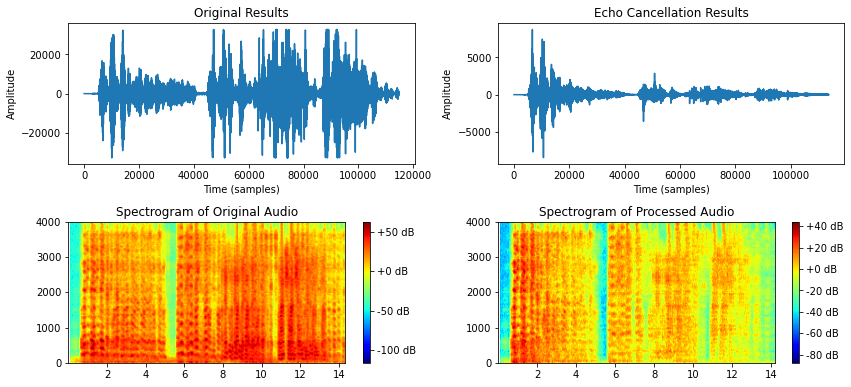

In [15]:
#Main Code for flaf

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def flaf(x, d, M=1024, P=5, mu=0.2):
    nIters = min(len(x), len(d)) - M
    Q = P*2
    u = np.zeros(M)
    w = np.zeros((Q+1)*M)
    e = np.zeros(nIters)
    sk = np.zeros(P*M, dtype=np.int32)
    ck = np.zeros(P*M, dtype=np.int32)
    pk = np.tile(np.arange(P), M)
    for k in range(M):
        sk[k*P:(k+1)*P] = np.arange(1, Q, 2) + k*(Q+1)
        ck[k*P:(k+1)*P] = np.arange(2, Q+1, 2) + k*(Q+1)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        g = np.repeat(u, Q+1)
        g[sk] = np.sin(np.pi*pk*g[sk])
        g[ck] = np.cos(np.pi*pk*g[ck])
        y = np.dot(w, g.T)
        e_n = d[n] - y
        w = w + 2*mu*e_n*g/(np.dot(g, g)+1e-3)
        e[n] = e_n
    return e

def calculate_zcr(signal):
    crossings = np.nonzero(np.diff(np.signbit(signal)))[0]
    zcr = len(crossings) / (2 * len(signal))
    return zcr

def calculate_snr(clean_signal, processed_signal):
    min_len = min(len(clean_signal), len(processed_signal))
    clean_signal = clean_signal[:min_len]
    processed_signal = processed_signal[:min_len]
    noise = processed_signal - clean_signal
    snr = 10 * np.log10(np.sum(clean_signal**2) / np.sum(noise**2))
    return snr

def calculate_mse(clean_signal, processed_signal):
    min_len = min(len(clean_signal), len(processed_signal))
    clean_signal = clean_signal[:min_len]
    processed_signal = processed_signal[:min_len]
    mse = np.mean((clean_signal - processed_signal)**2)
    return mse

# Load audio file
rate, data = wavfile.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = data.astype(np.float32)  # convert to float32
d = data.astype(np.float32)  # convert to float32

# Apply FLAF algorithm
e = flaf(x, d)

# Save output as audio file
wavfile.write("C:\\Users\\Sudhakar\\Downloads\\samples_a_out121.wav", rate, e.astype(np.int16))

# Calculate metrics
zcr_original = calculate_zcr(x)
zcr_processed = calculate_zcr(e)
snr = calculate_snr(x, e)
mse = calculate_mse(x, e)

# Plot echo cancellation results
plt.figure(figsize=(12, 8))
plt.subplot(321)
plt.plot(x)
plt.title("Original Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

plt.subplot(322)
plt.plot(e)
plt.title("Echo Cancellation Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

# Plot spectrogram of the original audio
plt.subplot(323)
plt.specgram(x, Fs=rate, cmap='jet')
plt.title("Spectrogram of Original Audio")
plt.colorbar(format="%+2.0f dB")

# Plot spectrogram of the echo cancellation results
plt.subplot(324)
plt.specgram(e, Fs=rate, cmap='jet')
plt.title("Spectrogram of Processed Audio")
plt.colorbar(format="%+2.0f dB")

print("SNR:",snr)
print("ZCR_origi:",zcr_original)
print("ZCR_process:",zcr_processed)
print("MSE:",mse)
# # Display ZCR, SNR, and MSE
# plt.subplot(325)
# plt.bar(['Original', 'Processed'], [zcr_original, zcr_processed])
# plt.title("Zero Crossing Rate (ZCR)")
# plt.ylabel("ZCR")

# plt.subplot(326)
# plt.bar(['SNR', 'MSE'], [snr, mse])
# plt.title("Signal-to-Noise Ratio (SNR) and Mean Squared Error (MSE)")

plt.tight_layout()
plt.show()
